# Traffic flow
Define $V$ as speed of traffic in km/h.
Define traffic density in cars per km $\rho$.
Define flow rate F in cars per hour $F$.

Assumptions:
* As $\rho \rightarrow 0$, $V \rightarrow V_{max}$.
* As $\rho \rightarrow \rho_{max}$, $V \rightarrow 0$.

One solution for these assumptions is
$$V = V_{max}(1-\rho/\rho_{max})$$

$F$ can be expressed as $F=V\rho = \rho V_{max}(1-\rho/\rho_{max})$

We can use nonlinear convection equation using the wave speed $\partial F / \partial \rho$:

$$\frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial \rho} \frac{\partial \rho}{\partial x} = 0 = \frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial x}$$

Use forward time difference and backward space difference. $V_{max}= 80$, road length $L=11$, $\rho_{max} = 250$, $n_x$ = 51, $dt=0.001$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
V_max=136
L=11
rho_max=250
nx=51
dt=0.001 #
nt = 151

$$\frac{\rho(t+dt)-\rho(t)}{dt} + \frac{F(x)-F(x-dx)}{dx} = 0 $$

$$\rho(t+dt) = \rho(t)  - dt \frac{F(x)-F(x-dx)}{dx} $$

0.22 0.001 0.004545454545454545
30.2222222222
34.5519861904
30.988747028


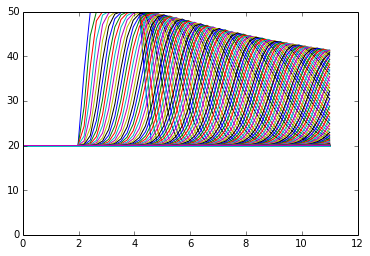

In [6]:
x, dx = np.linspace(0,L,nx, retstep=True)
print(dx,dt, dt/dx)
rho = np.ones(nx)*20
rho[10:20] = 50
rho[0]=20
V = V_max*(1-rho/rho_max)
print(min(V)*1000/3600)
for n in range(nt):
    V = V_max*(1-rho/rho_max)
    F = V*rho
    rho[1:] -= dt/dx * (F[1:]-F[0:-1])
    plt.plot(x, rho, label=n)
    if n == 51:
        average_velocity = np.sum(V*dx)/L/3600*1000
        print(average_velocity)
        minimal_velocity = min(V)/3600*1000
        print(minimal_velocity)
plt.ylim(0,50)
plt.show()